In [1]:
# Importing necessary libraries

# For data manipulation
import pandas as pd
import numpy as np

# For data visualizations
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# For splitting the data into train/test
from sklearn.model_selection import train_test_split

# For calculating mutual importance score
from sklearn.metrics import mutual_info_score

# For encoding categorical variables for use in a machine learning model
from sklearn.feature_extraction import DictVectorizer

# For building and training a Logistic Regression model
from sklearn.linear_model import LogisticRegression

# For determining model accuracy
from sklearn.metrics import accuracy_score

# For building and training a linear regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# For handling warnings
import warnings
warnings.filterwarnings("ignore")

### Initial Data Exploration and Initial Data Prep

In [2]:
# Reading in data into dataframe
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
# Getting # of columns, values in each column, and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Checking for missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# In "total_bedrooms" going to fill missing values with 0
df["total_bedrooms"] = df["total_bedrooms"].fillna(0)

In [6]:
# Checking that there are no more missing values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Feature Engineering

In [7]:
# Creating a new feature called "rooms_per_household"
df["rooms_per_household"] = df["households"] / df["total_rooms"]

In [8]:
# Creating a new feature called "bedrooms_per_room"
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]

In [9]:
# Creating a new feature called "population_per_household"
df["population_per_household"] = df["population"] / df["households"]

In [10]:
# Displaying dataframe with new features
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.143182,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.160304,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.120654,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.171900,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.159189,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.198198,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.163558,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.192103,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.187634,0.219892,2.123209


In [11]:
# Getting info on dataframe with new features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


### Question 1: What is the most frequent observation (mode) for the column ocean_proximity?

In [12]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
df["ocean_proximity"].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

### Question 1 Answer: The most frequent observation for ocean_proximity is <1H OCEAN

### Question 2: 

* Create the correlation matrix for the numerical features of your train dataset.
    * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:

* total_bedrooms and households
* total_bedrooms and total_rooms
* population and households
* population_per_household and total_rooms

Make median_house_value binary
* We need to turn the median_house_value variable from numeric into binary.
* Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

Split the data
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value (median_house_value) is not in your dataframe.

In [14]:
# Getting the mean of median_house_value
mean_median_house_value = df["median_house_value"].mean()

In [15]:
# Creating a new feature called above_average, which will be used later for binary classification. 0 represents the median_house_value is below the mean of the median house values, and 1 represents that median_hosue_value is above the mean of the median house values
df["above_average"] = np.where(df["median_house_value"] > mean_median_house_value, 1, 0)

In [16]:
# Viewing updated dataframe
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.143182,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.160304,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.120654,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.171900,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.159189,0.172096,2.181467,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.198198,0.224625,2.560606,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.163558,0.215208,3.122807,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.192103,0.215173,2.325635,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.187634,0.219892,2.123209,0


In [17]:
# Determining lengths for each dataframe for a 60%, 20%, and 20% split
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

print("The number of records for df_train, df_val, and df_test need to be {}, {}, and {}".format(n_train, n_val, n_test))

The number of records for df_train, df_val, and df_test need to be 12384, 4128, and 4128


In [18]:
# Creating train, val, and test splits of 60%, 20%, and 20% with seed value of 42
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [19]:
# Getting lengths of train, val, and test dataframes
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [20]:
# Dropping any added indexes
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [21]:
# Assigning ground truth for validating model performance on train, validation, and test dataframes for classification model
y_train = df_train["above_average"]
y_val = df_val["above_average"]
y_test = df_test["above_average"]

# Deleting target from training, validation, and testing data
df_train.drop(["median_house_value"], axis = 1, inplace = True)
df_val.drop(["median_house_value"], axis = 1, inplace = True)
df_test.drop(["median_house_value"], axis = 1, inplace = True)

In [22]:
# Correlation between numerical variables
df_train.corr(method = "pearson")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,above_average
longitude,1.000000,-0.925005,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,0.088859,0.102320,0.011022,-0.074043
latitude,-0.925005,1.000000,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,-0.151897,-0.124507,-0.002301,-0.097513
housing_median_age,-0.099812,0.002477,1.000000,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,0.187499,0.129456,0.012167,0.082397
total_rooms,0.036449,-0.025914,-0.363522,1.000000,0.931546,0.853219,0.921441,0.198951,-0.224083,-0.194185,-0.029452,0.123332
total_bedrooms,0.063840,-0.059730,-0.324156,0.931546,1.000000,0.877340,0.979399,-0.009833,0.015191,0.078094,-0.034301,0.050593
population,0.091670,-0.100272,-0.292476,0.853219,0.877340,1.000000,0.906841,-0.000849,0.046666,0.031592,0.064998,-0.022491
households,0.049762,-0.063529,-0.306119,0.921441,0.979399,0.906841,1.000000,0.011925,0.055556,0.058004,-0.032522,0.066458
median_income,-0.016426,-0.076805,-0.119591,0.198951,-0.009833,-0.000849,0.011925,1.000000,-0.538066,-0.616617,-0.000454,0.541110
rooms_per_household,0.088859,-0.151897,0.187499,-0.224083,0.015191,0.046666,0.055556,-0.538066,1.000000,0.892243,-0.001303,-0.186929
bedrooms_per_room,0.102320,-0.124507,0.129456,-0.194185,0.078094,0.031592,0.058004,-0.616617,0.892243,1.000000,-0.002851,-0.224398


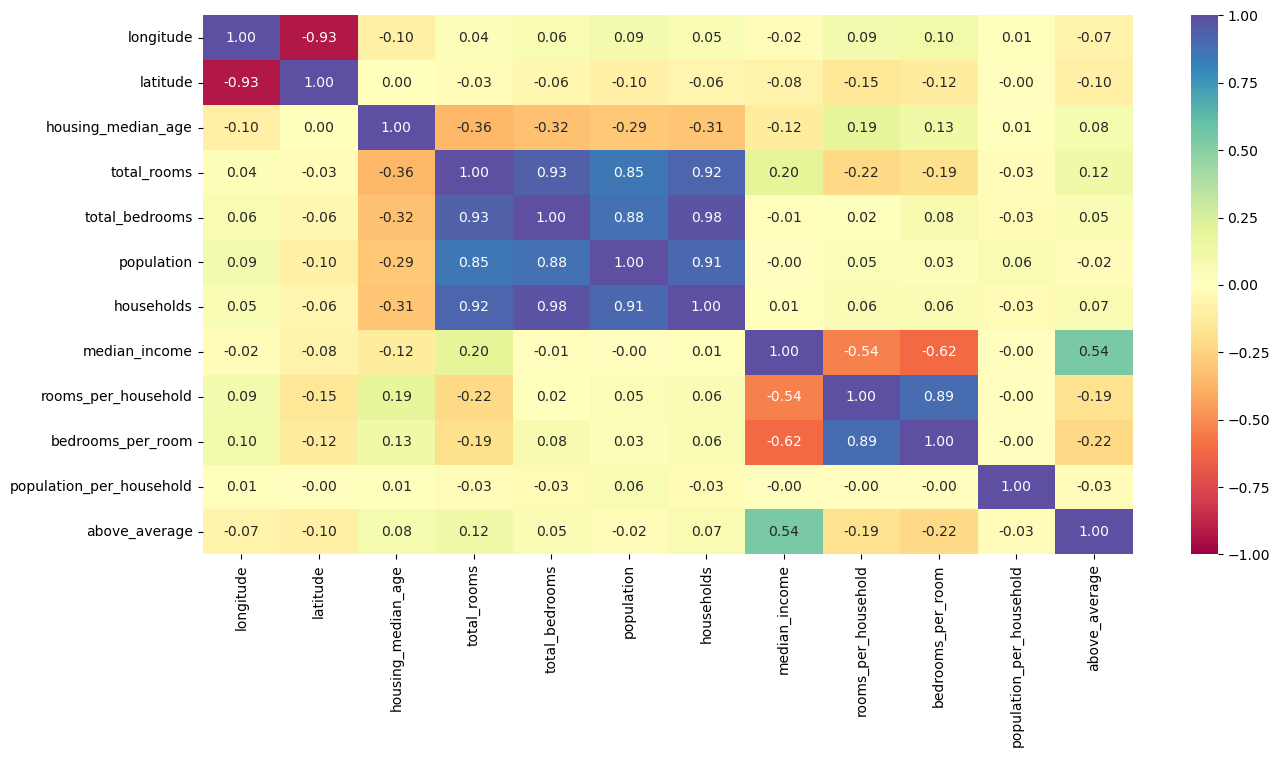

In [23]:
# Correlation heatmap for all numerical variables
plt.figure(figsize=(15, 7))
sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [24]:
# Getting numerical correlations in a table sorted by descending
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
df.corr().unstack().sort_values(ascending = False)

longitude                 longitude                   1.000000
latitude                  latitude                    1.000000
population_per_household  population_per_household    1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_house_value        median_house_value          1.000000
median_income             median_income               1.000000
population                population                  1.000000
total_bedrooms            total_bedrooms              1.000000
total_rooms               total_rooms                 1.000000
housing_median_age        housing_median_age          1.000000
households                households                  1.000000
above_average             above_average               1.000000
households                total_bedrooms              0.966507
total_bedrooms            households                  0.966507
total_rooms               total_bedrooms              0

### Question 2 Answer: The two features that have the highest correlation in the dataset is total_bedrooms and households.

### Question 3
Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.

What is the value of mutual information?
Round it to 2 decimal digits using round(score, 2)
Options:

* 0.26
* 0
* 0.10
* 0.16

In [25]:
# Calculating mutual information score between ocean_proximity (the lone categorical value) and above_average
round(mutual_info_score(df_train["ocean_proximity"], df_train["above_average"]), 2)

0.1

### Question 3 Answer: The value for mutual information is 0.10.

### Question 4
Now let's train a logistic regression model.

Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

* 0.60
* 0.72
* 0.84
* 0.95

In [26]:
# Specifying numerical variables
num = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "rooms_per_household", "bedrooms_per_room", "population_per_household"]

# Specifying categorical variables
cat = ["ocean_proximity"]

In [27]:
# Specifying a new training dictionary without above_average
train_dict = df_train[cat + num].to_dict(orient = 'records')

In [28]:
# Using DictVectorizer instead of having to use LabelEncoder and OneHotEncoder separately
dv = DictVectorizer(sparse = False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [29]:
# Defining a Logistic Regression Model
model = LogisticRegression(solver = "liblinear", C = 1.0, max_iter = 1000, random_state = 42)

In [30]:
# Fitting the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [31]:
# Getting model predictions on validation data
val_dict = df_val[cat + num].to_dict(orient = 'records')
X_val = dv.transform(val_dict)

# Predicing on X_val
y_pred = model.predict(X_val)

# Calculating model accuracy on validation data
accuracy = np.round(accuracy_score(y_val, y_pred), 2)
print(accuracy)

0.84


### Question 4 Answer: The accuracy on the validation dataset is 0.84.

### Question 5
Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?
* total_rooms
* total_bedrooms
* population
* households

note: the difference doesn't have to be positive

In [32]:
orig_score = accuracy

features = cat + num

score_differentials = []

# Creating a loop to drop features and run the model each time without dropped feature to determine weakest feature
for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient = 'records')

    dv = DictVectorizer(sparse = False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver = "liblinear", C = 1.0, max_iter = 1000, random_state = 42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient = 'records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    
    score_diff = orig_score - score
    
    score_differentials.append(score_diff)
    
    print("For feature {}, the accuracy difference is {}, and the model accuracy is {}".format(c, round(score_diff, 4), accuracy))

For feature ocean_proximity, the accuracy difference is 0.0222, and the model accuracy is 0.84
For feature longitude, the accuracy difference is 0.0091, and the model accuracy is 0.84
For feature latitude, the accuracy difference is 0.0076, and the model accuracy is 0.84
For feature housing_median_age, the accuracy difference is 0.0084, and the model accuracy is 0.84
For feature total_rooms, the accuracy difference is 0.0021, and the model accuracy is 0.84
For feature total_bedrooms, the accuracy difference is 0.0023, and the model accuracy is 0.84
For feature population, the accuracy difference is 0.0122, and the model accuracy is 0.84
For feature households, the accuracy difference is 0.0081, and the model accuracy is 0.84
For feature median_income, the accuracy difference is 0.0561, and the model accuracy is 0.84
For feature rooms_per_household, the accuracy difference is 0.0047, and the model accuracy is 0.84
For feature bedrooms_per_room, the accuracy difference is 0.0033, and the

In [33]:
# Prining the minium value of score_differentials
print(round(min(score_differentials), 4))

0.0021


### Question 5 Answer: total_rooms has the smallest difference

### Question 6
For this question, we'll see how to use a linear regression model from Scikit-Learn
We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest alpha.

Options:

* 0
* 0.01
* 0.1
* 1
* 10

In [34]:
# Applying log transform to median_house_value
df["median_house_value"] = np.log1p(df["median_house_value"])

In [35]:
# Creating train, val, and test splits of 60%, 20%, and 20% with seed value of 42
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [36]:
# Specifing a dictionary for training
train_dict = df_train[cat + num].to_dict(orient = 'records')

In [37]:
# One-hot encoding categorical values
dv = DictVectorizer(sparse = False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient = 'records')
X_val = dv.transform(val_dict)

In [38]:
# Creating a loop to fit model on different alpha values
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha = a,random_state = 42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.362
0.01 0.362
0.1 0.362
1 0.362
10 0.363


### Question 6 Answer: 0 has the best RMSE on the validation set